<a href="https://colab.research.google.com/github/Labs123355/hey_world/blob/main/DAAN_545_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data import and necessary *libraries*

In [ ]:
!#\usr\bin\env python
'''This is my DAAN 545 project'''

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

1. Upload Registration.csv Download Registration.csv and Course_info.xlsx Download Course_info.xlsx into Pandas. (5 points)

In [ ]:
registration_data = pd.read_csv('/content/drive/MyDrive/DAAN 545 DATA/Projectdata.csv')

# Clean and standardize student names
def clean_student_name(name):
    # Convert to title case
    name = name.title()
    # Replace excessive spaces with a single space
    name = ' '.join(name.split())
    return name

registration_data['Student name'] = registration_data['Student name'].apply(clean_student_name)



In [ ]:
#!pip install python-docx
if ModuleNotFoundError:
  try:
    !pip install python-docx
  except:
    pass

from docx import Document
import pandas as pd

# Load the .docx document
doc_path = '/content/drive/MyDrive/DAAN 545 DATA/Projectdata_courses.docx'
doc = Document(doc_path)

# Initialize an empty list to store dataframes
courses = []

# Iterate over each table in the document
for table in doc.tables:
    data = []
    keys = None
    for i, row in enumerate(table.rows):
        # Get the text from each cell in the row
        text = [cell.text.strip() for cell in row.cells]
        # Use the first row as the header if keys are not set
        if i == 0:
            keys = text
        else:
            # Append only rows that contain a valid course code
            if len(text) >= 2 and "ARTS" in text[0]:
                data.append(text)
    # Convert the data to a DataFrame and add it to the list
    if data:  # Ensure there's data to add
        course_data = pd.DataFrame(data, columns=keys)
        courses.append(course_data)

# Concatenate all the dataframes into a single dataframe
if courses:
    course_data = pd.concat(courses, ignore_index= True)

# rename
course_data.columns.values[0] = "course_number"
course_data.columns.values[1] = "course_name"
# Display the cleaned course data
course_data

# Clean and standardize course names
def clean_course_name(name):
    # Convert to title case
    name = name.title()
    # Replace excessive spaces with a single space
    name = ' '.join(name.split())
    # Capitalize names
    name = name.upper()
    return name

course_data['course_name'] = course_data['course_name'].apply(clean_course_name)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 10.4 MB/s eta 0:00:00


## Data cleanse

Looks okay because all these columns are names. oject data type looks ok

In [ ]:
registration_data.duplicated().sum(), course_data.duplicated().sum()


(1245, 0)

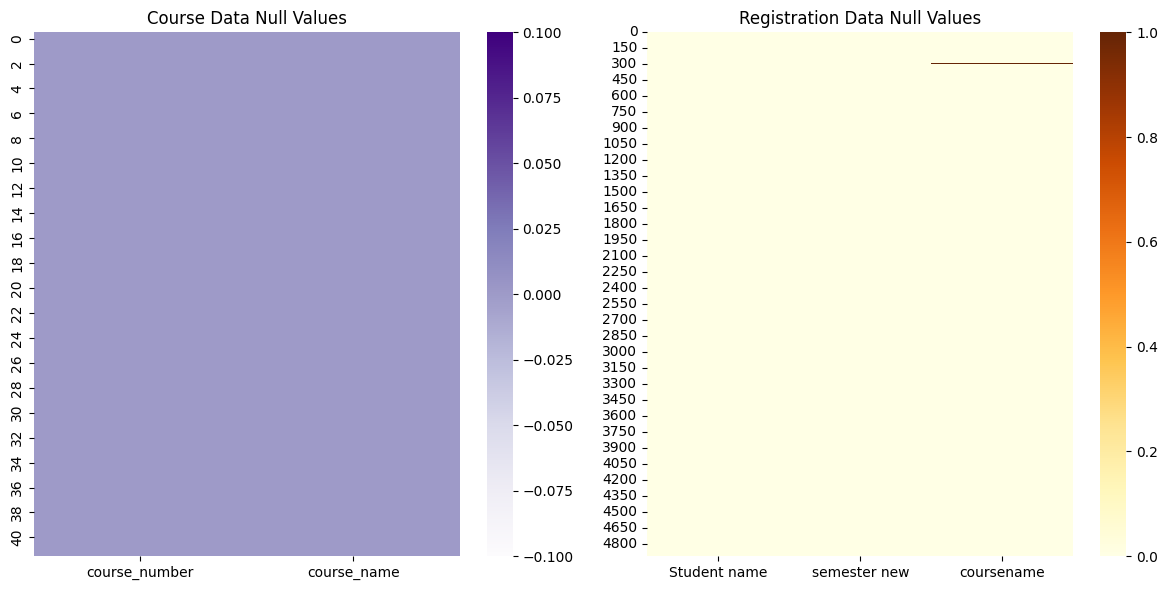

In [ ]:
# combine heatmap so that the show in one plot

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(course_data.isnull(), ax=axes[0], cmap="Purples")
axes[0].set_title('Course Data Null Values')

sns.heatmap(registration_data.isnull(), ax=axes[1], cmap="YlOrBr")
axes[1].set_title('Registration Data Null Values')

plt.tight_layout()
plt.show()


In [ ]:
class Janitor:
    '''Janitor class for cleaning data'''
    # initalise this instance of the class. this will help make sure when we call are class it takes our dataframes
    def __init__(self, df):
        self.df = df

    def duplicates_handler(self):
        # If duplicates appear in the dataset
        if self.df.duplicated().sum() > 0:
            # Drop duplicates
            self.df.drop_duplicates(keep=False, inplace=True)
        #return cleaned df
        return self.df

    def null_handler(self):
        # If null values appear in the dataset
        if self.df.isnull().sum().sum() > 0:
            # Drop null values
            self.df.dropna(inplace=True)
        return self.df

    def report(self):
      # Duplicates find how many
      print(f'We have {self.df.duplicated().sum()} duplicates in our dataset')

      # Let look at rows and columns
      print(f'We have {self.df.shape[0]} rows and {self.df.shape[1]} columns')



So I could have wrote this as a function. I chose to use a class because my hope is I can use it for future projects or assignments. I used a clas just incase the cleaning becomes more complexed in the future

Now our Janitor class just cleans our df if we want to use what it has handled lets call our report() method

In [ ]:
clean = Janitor(registration_data)
clean.duplicates_handler()
clean.null_handler()
clean.report()

We have 0 duplicates in our dataset
We have 2788 rows and 3 columns


In [ ]:
clean = Janitor(course_data)
clean.duplicates_handler()
clean.null_handler()
clean.report()

We have 0 duplicates in our dataset
We have 42 rows and 2 columns


In [ ]:
registration_data.duplicated().sum(), course_data.duplicated().sum()

(0, 0)

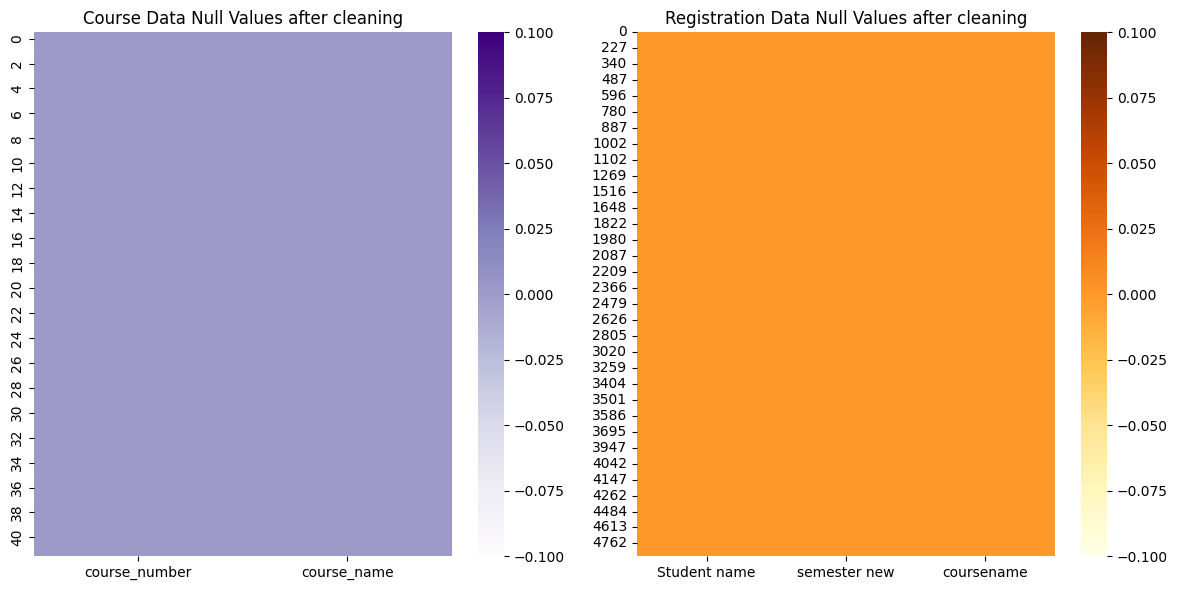

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(course_data.isnull(), ax=axes[0], cmap="Purples")
axes[0].set_title('Course Data Null Values after cleaning')

sns.heatmap(registration_data.isnull(), ax=axes[1], cmap="YlOrBr")
axes[1].set_title('Registration Data Null Values after cleaning')

plt.tight_layout()
plt.show()

5. Inner join two datasets. (20 points)

In [ ]:
course_data.head()

,course_number,course_name
0,ARTS 400,EXPERIMENTAL WRITING SEM: THE ECOLOGY OF POETRY
1,ARTS 401,ART: ANCIENT TO 1945
2,ARTS 465,ENVIRONMENTAL SYSTEMS II
3,ARTS 486,COMPUTER LINEAR ALGEBRA
4,ARTS 512,ANALYTICAL MECHANICS


In [ ]:
registration_data.head()

,Student name,semester new,coursename
0,Bill Mumy,Fall 2004,BEHAVIORAL PHARMACOLOGY
1,Bill Mumy,Fall 2000,AMERICAN FOREIGN POLICY
2,Bill Mumy,Fall 2003,"DRUGS, BRAIN AND MIND"
3,Bill Mumy,Fall 2005,Environmental Case Studies
4,Bill Mumy,Fall 2000,COMPUTER LINEAR ALGEBRA


In [ ]:
# Strip whitespace from column names to avoid key error
registration_data.columns = registration_data.columns.str.strip()
course_data.columns = course_data.columns.str.strip()

# Display the cleaned columns of each dataframe
print("Cleaned columns in registration_data:", registration_data.columns)
print("Cleaned columns in course_data:", course_data.columns)

Cleaned columns in registration_data: Index(['Student name', 'semester new', 'coursename'], dtype='object')
Cleaned columns in course_data: Index(['course_number', 'course_name'], dtype='object')


In [ ]:
# Perform inner join on 'Course Name' and 'coursename'
merged_data = pd.merge(registration_data, course_data,how = 'inner', left_on='coursename', right_on='course_name')
merged_data.head()
def split_name(name):
  return pd.Series(name.split(' '))
# SPLIT YEARS AND NAME
merged_data[['semester', 'year']] = merged_data['semester new'].apply(lambda x: split_name(x))

merged_data.drop('semester new', axis=1, inplace=True)
merged_data.drop('coursename', axis=1, inplace=True) # drop coures names form left joned data
merged_data.rename(columns={'Student name': 'student_name'}, inplace=True)
merged_data.head()

,student_name,course_number,course_name,semester,year
0,Bill Mumy,ARTS 516,BEHAVIORAL PHARMACOLOGY,Fall,2004
1,Dom Deluise,ARTS 516,BEHAVIORAL PHARMACOLOGY,Fall,2000
2,Sally Field,ARTS 516,BEHAVIORAL PHARMACOLOGY,Summer,2001
3,David Cohen,ARTS 516,BEHAVIORAL PHARMACOLOGY,Fall,2004
4,Jan Burke,ARTS 516,BEHAVIORAL PHARMACOLOGY,Fall,2000


In [ ]:
merged_data.groupby('course_name').count()

,student_name,course_number,semester,year
course_name,,,,
19TH-CENTURY BRITISH LITERATURE,1,1,1,1
A WORLD AT WAR,200,200,200,200
AESTHETICS,9,9,9,9
AFRICAN-AMERICAN LIT: AFRICAN-AMER LIT:CHANGE,18,18,18,18
AMERICAN HEALTH POLICY,41,41,41,41
AMERICAN SOUTH 1861-PRES,19,19,19,19
ANALYTICAL MECHANICS,192,192,192,192
ANALYZING THE POL WORLD,3,3,3,3
ART AND RELIGION,3,3,3,3


Identify courses that are not offered by the program

In [ ]:

# Perform a left join to identify unmatched courses
merged_data_lft = pd.merge(registration_data, course_data, how='left', left_on='coursename', right_on='course_name')

# Identify courses that are not offered by the program (i.e., those with NaN in 'course_name')
unmatched_courses = merged_data_lft[merged_data_lft['course_name'].isna()]

# Display the unmatched courses
unmatched_courses.groupby('coursename').count()

,Student name,semester new,course_number,course_name
coursename,,,,
1000 YRS MUSICAL LISTENG: 1000 YRS MUSICAL LISTENG,1,1,0,0
19TH-CENT BRITISH LIT,24,24,0,0
19TH-CENT NOVEL,3,3,0,0
20TH-CENT POETRY,3,3,0,0
20th Century Russian Literature: Fiction and Reality,22,22,0,0
...,...,...,...,...
FRANCE AND ITS OTHERS: Anthropology and French Modernism,1,1,0,0
FREEDOM OF EXPRESSION,1,1,0,0
FRENCH PHONETICS,1,1,0,0


Which course has the highest registration? (15 points)

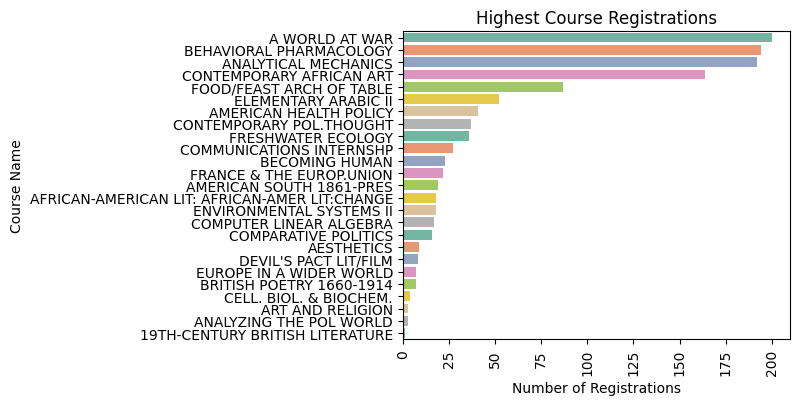

In [ ]:

# Get the course names and counts
course_names = merged_data.groupby('course_name')['semester'].count().sort_values(ascending=False).index
course_counts = merged_data.groupby('course_name')['semester'].count().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(5, 4))
sns.barplot(x=course_counts, y=course_names, palette='Set2')

# Add labels and title
plt.xlabel('Number of Registrations')
plt.ylabel('Course Name')
plt.title('Highest Course Registrations')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


## Binary Matrix

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   student_name   1205 non-null   object
 1   course_number  1205 non-null   object
 2   course_name    1205 non-null   object
 3   semester       1205 non-null   object
 4   year           1205 non-null   object
dtypes: object(5)
memory usage: 47.2+ KB


In [ ]:
# Encode Categories into dummies
from sklearn import preprocessing as pre # did it this way because we are going to use this class methods a few times

# Extract categorical columns
categorical_columns = merged_data.select_dtypes(include=['object']).columns.tolist()[1:]

#Initialize OneHotEncoder
encoder = pre.OneHotEncoder(sparse_output= False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(merged_data[categorical_columns]).astype(int)

# Create a new DataFrame with the one-hot encoded features
encoded_df = pd.DataFrame(one_hot_encoded, columns= encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded features with the original DataFrame
encoded_data = pd.concat([merged_data, encoded_df], axis=1)

# Drop the original categorical columns
encoded_data.drop(columns=categorical_columns, inplace=True)

# Display the resulting DataFrame
encoded_data.head()

# Aggregate the dummy variables using group by. Aggregating with group by naturally makes are index student names
pivot_table = encoded_data.groupby('student_name').max()

# show pivot table
pivot_table.head()

,course_number_ARTS 465,course_number_ARTS 484,course_number_ARTS 486,course_number_ARTS 488,course_number_ARTS 491,course_number_ARTS 492,course_number_ARTS 493,course_number_ARTS 512,course_number_ARTS 514,course_number_ARTS 516,...,course_name_FRESHWATER ECOLOGY,semester_Fall,semester_Spring,semester_Summer,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005
student_name,,,,,,,,,,,,,,,,,,,,,
Abella Abzug,0,0,0,0,0,0,0,1,1,1,...,0,1,1,0,0,0,1,1,1,1
Al Hirt,1,0,1,0,0,0,0,1,1,1,...,0,1,0,0,1,1,1,0,1,0
Alan Bates,0,0,0,0,0,0,0,1,1,1,...,0,1,1,1,1,1,0,0,1,1
Alec Baldwin,0,0,1,0,1,0,1,1,1,0,...,0,1,1,0,1,0,1,1,1,1
Andy Garcia,0,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,1,1,0,0,0


In [ ]:
# Merge the pivot table with the merged data on 'student_name'
result = pd.merge(merged_data, pivot_table, on='student_name')
result.head()


,student_name,course_number,course_name,semester,year,course_number_ARTS 465,course_number_ARTS 484,course_number_ARTS 486,course_number_ARTS 488,course_number_ARTS 491,...,course_name_FRESHWATER ECOLOGY,semester_Fall,semester_Spring,semester_Summer,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005
0,Bill Mumy,ARTS 516,BEHAVIORAL PHARMACOLOGY,Fall,2004,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,Bill Mumy,ARTS 486,COMPUTER LINEAR ALGEBRA,Fall,2000,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,Dom Deluise,ARTS 516,BEHAVIORAL PHARMACOLOGY,Fall,2000,0,0,0,0,0,...,0,1,1,0,1,0,1,1,0,0
3,Dom Deluise,ARTS 514,A WORLD AT WAR,Fall,2000,0,0,0,0,0,...,0,1,1,0,1,0,1,1,0,0
4,Dom Deluise,ARTS 493,AMERICAN HEALTH POLICY,Fall,2003,0,0,0,0,0,...,0,1,1,0,1,0,1,1,0,0


## Associate Rule Mining

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# We need to create a basket-like DataFrame where each row is a student and each column is a course, with values 1 if the course was taken, 0 otherwise.
# we already have our binary matrix for the apriori algorithm we only need use are course names for basket analysis
# Lets use our matrix

# Select columns
columns = pivot_table.columns.tolist()

# Filter to only include course_name columns
course_name_columns = [col for col in columns if col.startswith('course_name_')]

# Create the basket DataFrame with econded matrix
basket = pivot_table[course_name_columns]

# select each column in basket w/ course_name_....
basket_columns = [col for col in basket.columns if 'course_name_' in col]

# Rename each columns so algoritm does return course_name_....
basket = basket.rename(columns= {col: col.replace('course_name_', '') for col in basket_columns})

# Apply the Apriori algorithm with a minimum support threshold to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Generate association rules with a minimum confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Sort rules by lift to find the most significant associations
rules = rules.sort_values(by='lift', ascending=False)

# Display the top rules that could represent concentration areas
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules.head(10)

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
55,"(FRESHWATER ECOLOGY, A WORLD AT WAR)",(AMERICAN HEALTH POLICY),0.065068,0.678571,4.832753
208,"(FRESHWATER ECOLOGY, ANALYTICAL MECHANICS, A W...",(AMERICAN HEALTH POLICY),0.051370,0.652174,4.644751
127,"(FRESHWATER ECOLOGY, ANALYTICAL MECHANICS)",(AMERICAN HEALTH POLICY),0.054795,0.615385,4.382739
133,"(FRESHWATER ECOLOGY, CONTEMPORARY AFRICAN ART)",(AMERICAN HEALTH POLICY),0.054795,0.615385,4.382739
17,(FRESHWATER ECOLOGY),(AMERICAN HEALTH POLICY),0.075342,0.611111,4.352304
339,"(FRESHWATER ECOLOGY, CONTEMPORARY AFRICAN ART,...",(AMERICAN HEALTH POLICY),0.051370,0.600000,4.273171
410,"(ANALYTICAL MECHANICS, BEHAVIORAL PHARMACOLOGY...","(CONTEMPORARY AFRICAN ART, A WORLD AT WAR)",0.065068,0.950000,2.331092
382,"(ANALYTICAL MECHANICS, BEHAVIORAL PHARMACOLOGY...","(CONTEMPORARY AFRICAN ART, A WORLD AT WAR)",0.082192,0.923077,2.265029
309,"(BEHAVIORAL PHARMACOLOGY, CONTEMPORARY POL.THO...","(CONTEMPORARY AFRICAN ART, A WORLD AT WAR)",0.068493,0.909091,2.230710
213,"(BEHAVIORAL PHARMACOLOGY, AMERICAN HEALTH POLICY)","(CONTEMPORARY AFRICAN ART, A WORLD AT WAR)",0.085616,0.892857,2.190876


## Clustering

In [ ]:
pivot_table.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,course_number_ARTS 465,course_number_ARTS 484,course_number_ARTS 486,course_number_ARTS 488,course_number_ARTS 491,course_number_ARTS 492,course_number_ARTS 493,course_number_ARTS 512,course_number_ARTS 514,course_number_ARTS 516,...,course_name_FRESHWATER ECOLOGY,semester_Fall,semester_Spring,semester_Summer,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005
student_name,,,,,,,,,,,,,,,,,,,,,
Abella Abzug,0,0,0,0,0,0,0,1,1,1,...,0,1,1,0,0,0,1,1,1,1
Al Hirt,1,0,1,0,0,0,0,1,1,1,...,0,1,0,0,1,1,1,0,1,0
Alan Bates,0,0,0,0,0,0,0,1,1,1,...,0,1,1,1,1,1,0,0,1,1
Alec Baldwin,0,0,1,0,1,0,1,1,1,0,...,0,1,1,0,1,0,1,1,1,1
Andy Garcia,0,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,1,1,0,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


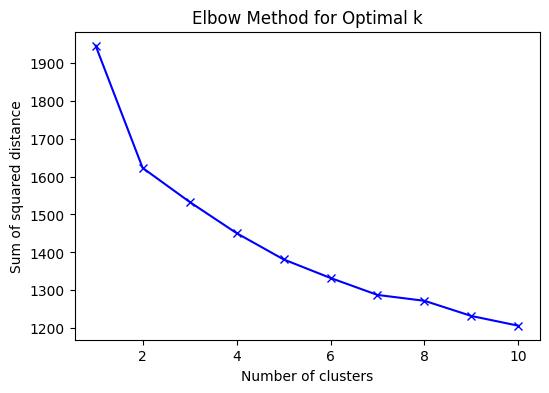

In [ ]:
X= pivot_table

#Plot the sum of squared distances from each point to its assigned cluster center (inertia) as a function of 𝑘
from sklearn.cluster import KMeans
inertia = []
kmax = 11
K = range(1, kmax)

for k in K:
    kmeans = KMeans(n_clusters=k, ,random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


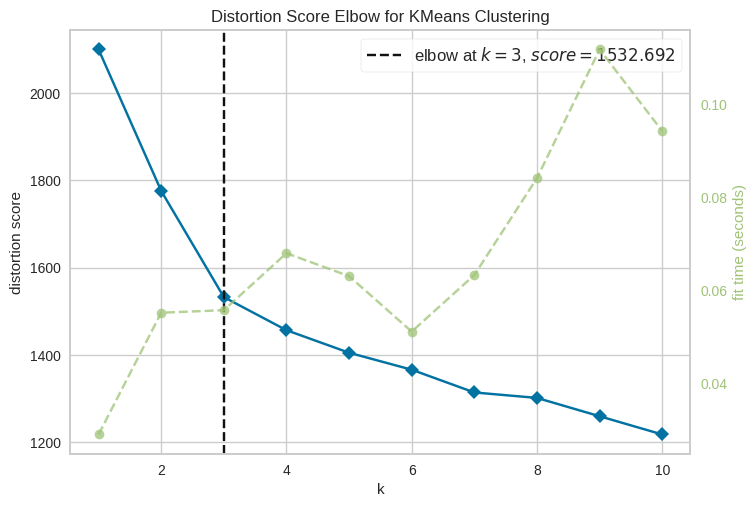

In [ ]:
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

The graph shows a noticeable "elbow" point at around K=3. This suggests that using 3 clusters might be optimal for grouping your data, as adding more clusters after this point results in only a small reduction in the sum of squared distances (inertia).

In [ ]:
pivot_table.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,course_number_ARTS 465,course_number_ARTS 484,course_number_ARTS 486,course_number_ARTS 488,course_number_ARTS 491,course_number_ARTS 492,course_number_ARTS 493,course_number_ARTS 512,course_number_ARTS 514,course_number_ARTS 516,...,course_name_FRESHWATER ECOLOGY,semester_Fall,semester_Spring,semester_Summer,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005
student_name,,,,,,,,,,,,,,,,,,,,,
Abella Abzug,0,0,0,0,0,0,0,1,1,1,...,0,1,1,0,0,0,1,1,1,1
Al Hirt,1,0,1,0,0,0,0,1,1,1,...,0,1,0,0,1,1,1,0,1,0
Alan Bates,0,0,0,0,0,0,0,1,1,1,...,0,1,1,1,1,1,0,0,1,1
Alec Baldwin,0,0,1,0,1,0,1,1,1,0,...,0,1,1,0,1,0,1,1,1,1
Andy Garcia,0,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,1,1,0,0,0


In [ ]:
!pip install scikit-learn-extra

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.7 MB/s eta 0:00:00


In [ ]:

# Perform K-Means clustering with an arbitrary number of clusters (e.g., K=2)
kmeans = KMeans(n_clusters= 3, random_state= 151 )
X['Cluster_K'] = kmeans.fit_predict(X)

# Display the clustering result
X.head()

#merge cluster with matching student names for more precision
result = pd.merge(merged_data, X, on='student_name')

#pivot table columns except cluster
pivot_table_columns = pivot_table.columns.tolist()[: len(pivot_table.columns.tolist()) -1]

#avoids key error when ran again
try:
  if KeyError:
    pass
  else:
    result.drop(columns= 'Cluster_K', inplace= True, axis= 1)
except:
  pass

result.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,student_name,course_number,course_name,semester,year,course_number_ARTS 465,course_number_ARTS 484,course_number_ARTS 486,course_number_ARTS 488,course_number_ARTS 491,...,semester_Fall,semester_Spring,semester_Summer,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,Cluster_K
0,Bill Mumy,ARTS 516,BEHAVIORAL PHARMACOLOGY,Fall,2004,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1,Bill Mumy,ARTS 486,COMPUTER LINEAR ALGEBRA,Fall,2000,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,Dom Deluise,ARTS 516,BEHAVIORAL PHARMACOLOGY,Fall,2000,0,0,0,0,0,...,1,1,0,1,0,1,1,0,0,1
3,Dom Deluise,ARTS 514,A WORLD AT WAR,Fall,2000,0,0,0,0,0,...,1,1,0,1,0,1,1,0,0,1
4,Dom Deluise,ARTS 493,AMERICAN HEALTH POLICY,Fall,2003,0,0,0,0,0,...,1,1,0,1,0,1,1,0,0,1


In [ ]:
# prompt: evaluate k means

from sklearn.metrics import silhouette_score

# Assuming 'X' is your feature matrix and 'kmeans' is your fitted KMeans model
silhouette_avg = silhouette_score(X.drop('Cluster_K', axis=1), kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.10357569084266664


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Conclusion and results

In [ ]:
pivot_table[course_name_columns].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,course_name_19TH-CENTURY BRITISH LITERATURE,course_name_A WORLD AT WAR,course_name_AESTHETICS,course_name_AFRICAN-AMERICAN LIT: AFRICAN-AMER LIT:CHANGE,course_name_AMERICAN HEALTH POLICY,course_name_AMERICAN SOUTH 1861-PRES,course_name_ANALYTICAL MECHANICS,course_name_ANALYZING THE POL WORLD,course_name_ART AND RELIGION,course_name_BECOMING HUMAN,...,course_name_COMPUTER LINEAR ALGEBRA,course_name_CONTEMPORARY AFRICAN ART,course_name_CONTEMPORARY POL.THOUGHT,course_name_DEVIL'S PACT LIT/FILM,course_name_ELEMENTARY ARABIC II,course_name_ENVIRONMENTAL SYSTEMS II,course_name_EUROPE IN A WIDER WORLD,course_name_FOOD/FEAST ARCH OF TABLE,course_name_FRANCE & THE EUROP.UNION,course_name_FRESHWATER ECOLOGY
student_name,,,,,,,,,,,,,,,,,,,,,
Abella Abzug,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
Al Hirt,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,1,0,1,0,0
Alan Bates,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
Alec Baldwin,0,1,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
Andy Garcia,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


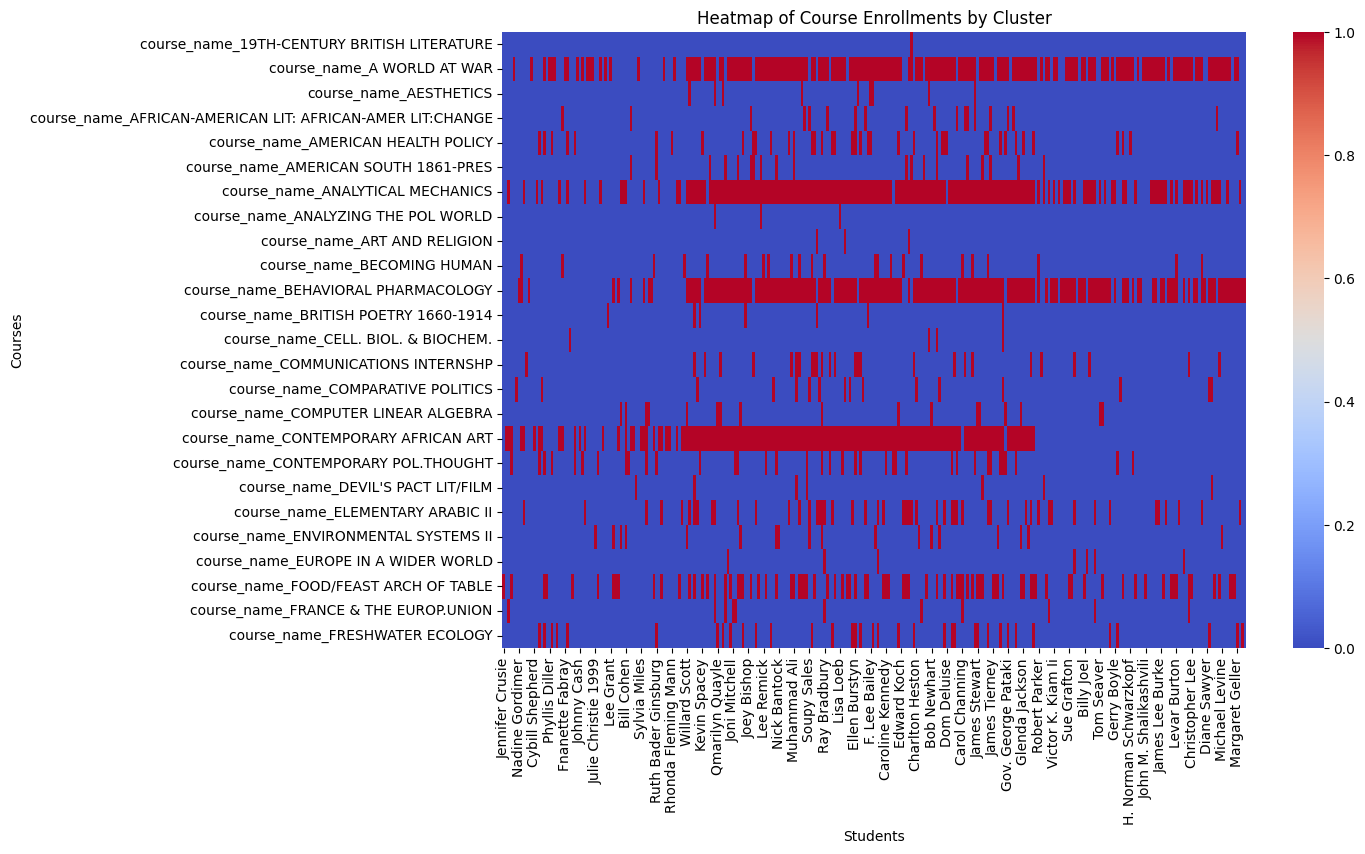

In [ ]:
# give me a list of all course name columns in pivot table data

course_name_columns = [col for col in pivot_table.columns if 'course_name_' in col]
pivot_table[course_name_columns].head()


#  DataFrame with clusters sorted
df_sorted = pivot_table.sort_values('Cluster_K')

# Create a heatmap to visualize course enrollments across clusters
plt.figure(figsize=(12, 8))
sns.heatmap(df_sorted[course_name_columns].T, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Course Enrollments by Cluster')
plt.xlabel('Students')
plt.ylabel('Courses')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


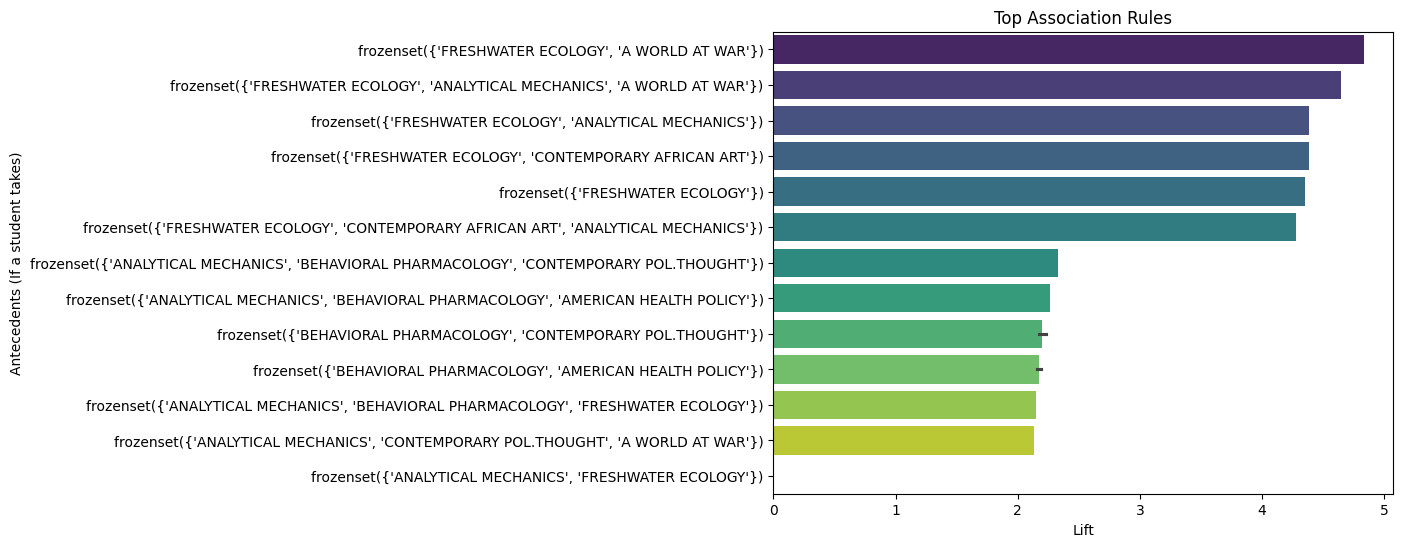

In [ ]:


# Plot the top association rules
plt.figure(figsize=(8, 6))
sns.barplot(x='lift', y='antecedents', data=rules.head(15), orient='h', palette='viridis')
plt.xlabel('Lift')
plt.ylabel('Antecedents (If a student takes)')
plt.title('Top Association Rules')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


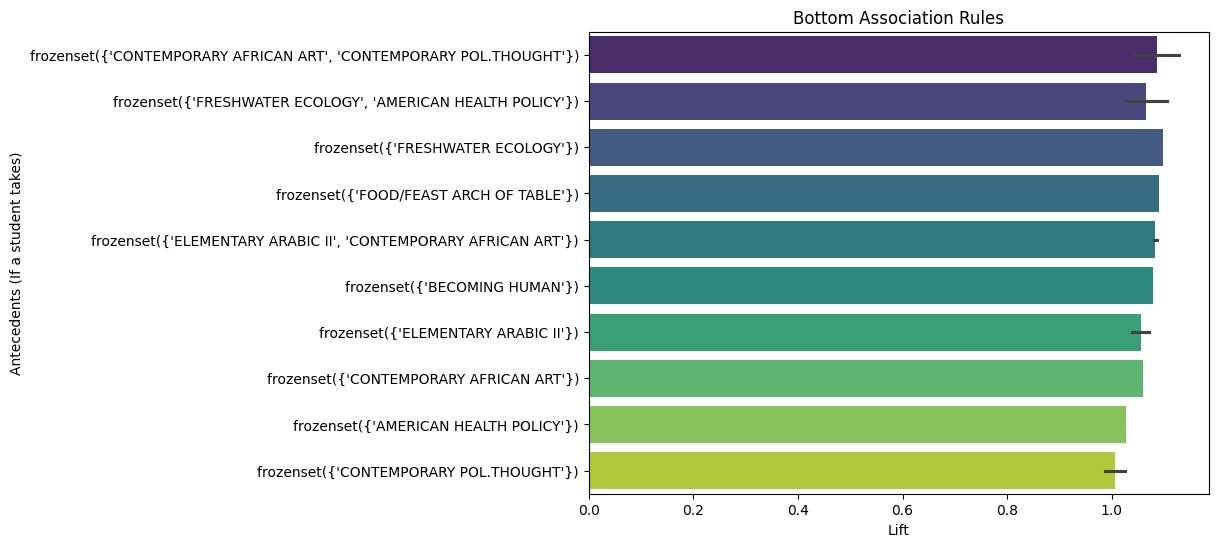

In [ ]:

# Plot the worst association rules
plt.figure(figsize=(8, 6))
sns.barplot(x='lift', y='antecedents', data=rules.tail(15), orient='h', palette='viridis')
plt.xlabel('Lift')
plt.ylabel('Antecedents (If a student takes)')
plt.title('Bottom Association Rules')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1000x800 with 0 Axes>

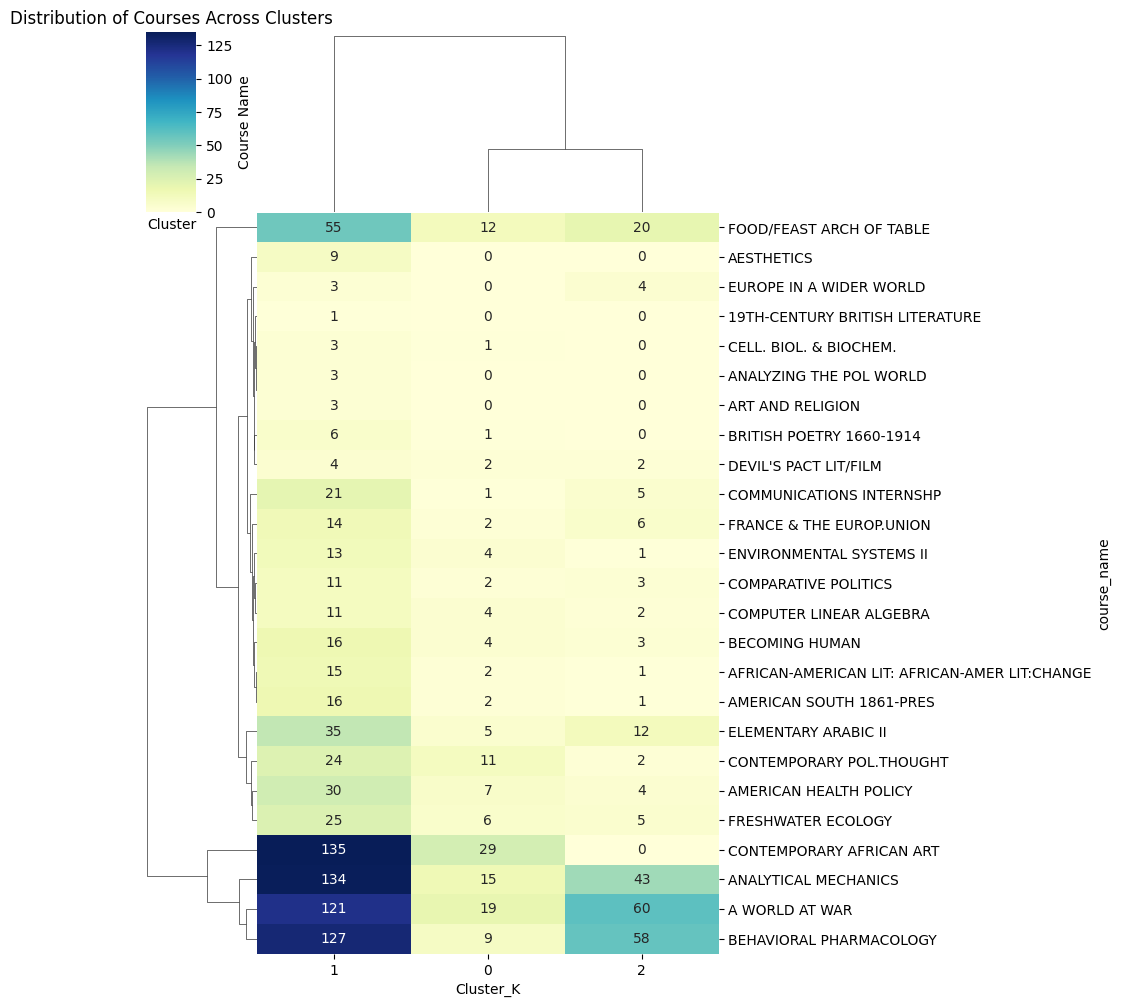

In [ ]:

course_cluster_pivot = result.pivot_table(index='course_name', columns='Cluster_K', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.clustermap(course_cluster_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribution of Courses Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Course Name')
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


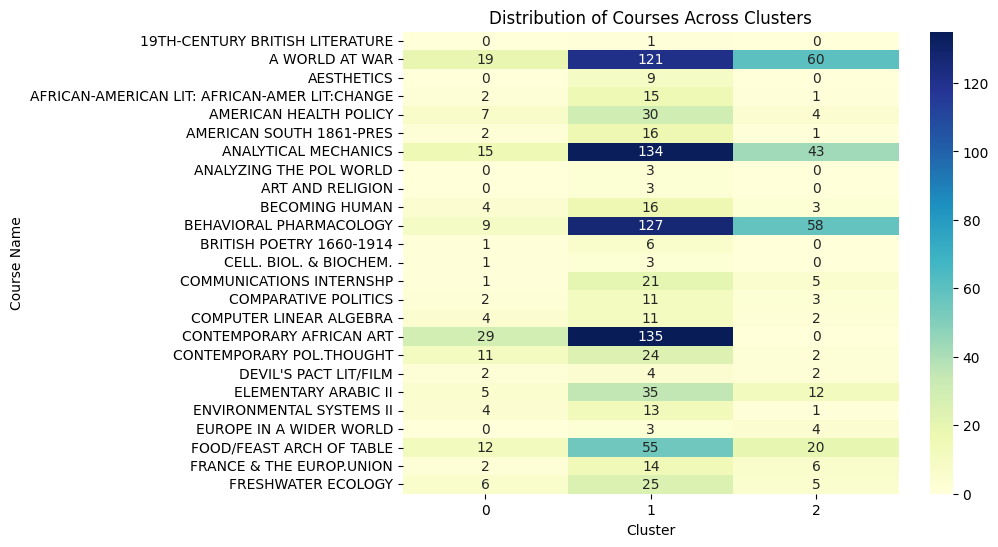

In [ ]:

# let's create a heatmap to show the distribution of courses across different clusters
course_cluster_pivot = result.pivot_table(index='course_name', columns='Cluster_K', aggfunc='size', fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(course_cluster_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribution of Courses Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Course Name')
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Average Silhouette Score: 0.10357569084266664


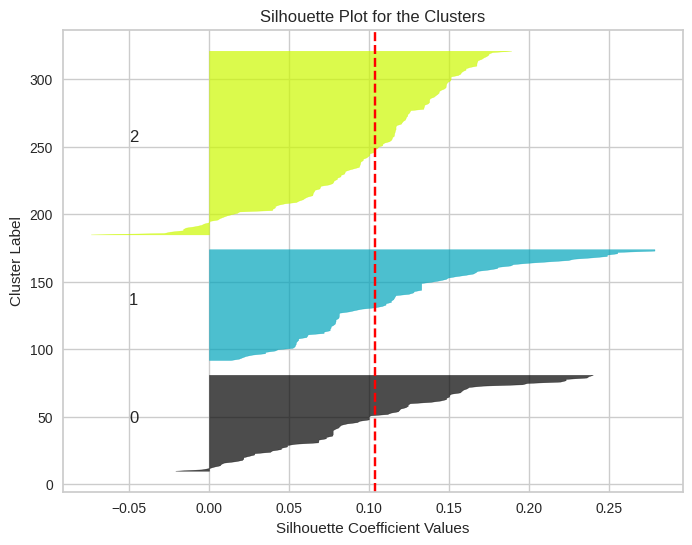

In [ ]:
# prompt: calc cohesion

from sklearn.metrics import silhouette_samples

# Calculate silhouette scores for each sample
silhouette_values = silhouette_samples(X.drop('Cluster_K', axis=1), kmeans.labels_)

# Print average silhouette score
print("Average Silhouette Score:", silhouette_avg)

# Plot silhouette scores for each cluster
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(3):  # Assuming 3 clusters
    cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for the Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.show()


In [ ]:
#calc silhouette coefficent

from sklearn.metrics import silhouette_score

# Assuming 'X' is your DataFrame with the 'Cluster_K' column representing cluster assignments
silhouette_avg = silhouette_score(X.drop('Cluster_K', axis=1), X['Cluster_K'])
print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.10357569084266664


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The heatmap above shows the distribution of courses across different clusters. This visualization helps identify which courses are commonly grouped together within the same cluster, providing insight into potential concentration areas.

In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
55,"(FRESHWATER ECOLOGY, A WORLD AT WAR)",(AMERICAN HEALTH POLICY),0.065068,0.678571,4.832753
208,"(FRESHWATER ECOLOGY, ANALYTICAL MECHANICS, A W...",(AMERICAN HEALTH POLICY),0.051370,0.652174,4.644751
127,"(FRESHWATER ECOLOGY, ANALYTICAL MECHANICS)",(AMERICAN HEALTH POLICY),0.054795,0.615385,4.382739
133,"(FRESHWATER ECOLOGY, CONTEMPORARY AFRICAN ART)",(AMERICAN HEALTH POLICY),0.054795,0.615385,4.382739
17,(FRESHWATER ECOLOGY),(AMERICAN HEALTH POLICY),0.075342,0.611111,4.352304
...,...,...,...,...,...
9,(ELEMENTARY ARABIC II),(A WORLD AT WAR),0.126712,0.711538,1.038846
15,(AMERICAN HEALTH POLICY),(BEHAVIORAL PHARMACOLOGY),0.095890,0.682927,1.027910
131,"(FRESHWATER ECOLOGY, AMERICAN HEALTH POLICY)",(BEHAVIORAL PHARMACOLOGY),0.051370,0.681818,1.026242
8,(CONTEMPORARY POL.THOUGHT),(A WORLD AT WAR),0.089041,0.702703,1.025946


Association Mining gives us insight into potential course combinations and reccomendations